In [100]:
import os
os.chdir("c://Users/rashid/Desktop/LSTM/deep-learning-v2-pytorch/intro-neural-networks/")

In [101]:
import pandas as pd
import numpy as np

In [102]:
data = pd.read_csv(r"C:\Users\rashid\Desktop\LSTM\deep-learning-v2-pytorch\intro-neural-networks\student-admissions\student_data.csv")

In [103]:
data.head(3)

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1


In [104]:
import matplotlib.pyplot as plt


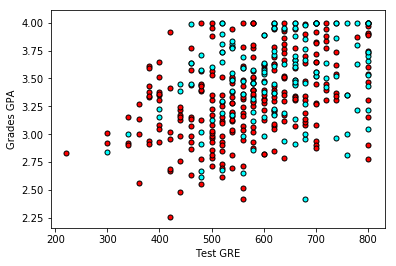

In [105]:
def plot_dataset(data):
    X = np.array(data[['gre', 'gpa']])
    y = np.array(data[['admit']])
    high = X[np.argwhere(y==1)]
    low = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in low], [s[0][1] for s in low], s=25, color='red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in high], [s[0][1] for s in high], s=25, color= 'cyan', edgecolor='k')
    plt.xlabel('Test GRE')
    plt.ylabel('Grades GPA')

plot_dataset(data)   
plt.show()

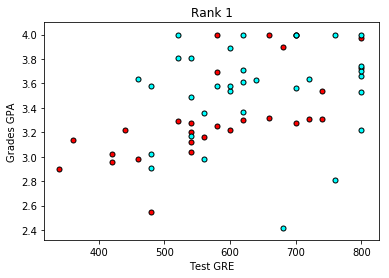

In [106]:
data_rank1 = data[data['rank']==1]
data_rank2 = data[data['rank']==2]
data_rank3 = data[data['rank']==3]


plot_dataset(data_rank1)
plt.title("Rank 1")
plt.show()

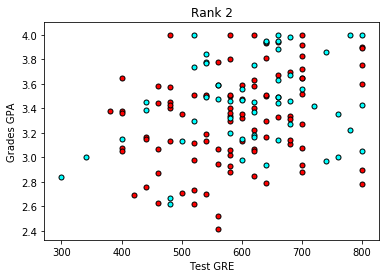

In [107]:
plot_dataset(data_rank2)
plt.title('Rank 2')
plt.show()

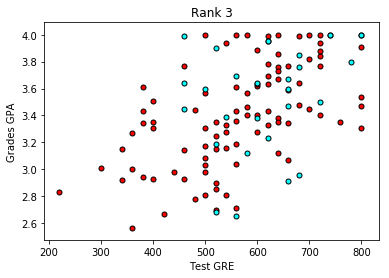

In [108]:
plot_dataset(data_rank3)
plt.title('Rank 3')
plt.show()

In [109]:
data_onehot_encoded = pd.concat([data, pd.get_dummies(data['rank'], prefix='rank')], axis=1)

In [110]:
data_onehot_encoded = data_onehot_encoded.drop('rank', axis=1)

In [111]:
data_onehot_encoded

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1
5,1,760,3.00,0,1,0,0
6,1,560,2.98,1,0,0,0
7,0,400,3.08,0,1,0,0
8,1,540,3.39,0,0,1,0
9,0,700,3.92,0,1,0,0


In [122]:
data_scaled = data_onehot_encoded[:]
data_scaled

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1
5,1,760,3.00,0,1,0,0
6,1,560,2.98,1,0,0,0
7,0,400,3.08,0,1,0,0
8,1,540,3.39,0,0,1,0
9,0,700,3.92,0,1,0,0


In [124]:
data_scaled.keys()

Index(['admit', 'gre', 'gpa', 'rank_1', 'rank_2', 'rank_3', 'rank_4'], dtype='object')

In [126]:
#scallling the data
data_scaled['gre'] = data_scaled['gre']/800
data_scaled['gpa'] = data_scaled['gpa']/4
data_scaled.head(10)

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,0.475,0.9025,0,0,1,0
1,1,0.825,0.9175,0,0,1,0
2,1,1.000,1.0000,1,0,0,0
3,1,0.800,0.7975,0,0,0,1
4,0,0.650,0.7325,0,0,0,1
5,1,0.950,0.7500,0,1,0,0
6,1,0.700,0.7450,1,0,0,0
7,0,0.500,0.7700,0,1,0,0
8,1,0.675,0.8475,0,0,1,0
9,0,0.875,0.9800,0,1,0,0


In [132]:
sample = np.random.choice(data_scaled.index, size= int(len(data_scaled)*0.9), replace= False)
train_data, test_sample = data_scaled.iloc[sample],data_scaled.drop(sample)

In [134]:
train_data.shape

(360, 7)

In [135]:
test_sample.shape

(40, 7)

In [136]:
features = train_data.drop('admit', axis=1)
targets = train_data['admit']
features_test = test_sample.drop('admit', axis=1)
features_target = test_sample['admit']

In [137]:
def sigmoid(x):
    return 1/1+(1+np.exp(-x))

def sigmoid_prime(x):
    return sigmoid(x)* (1-sigmoid(x))

def error_formula(y, output):
    return -y * np.log(output)-(1-y)*np.log(1-output)

In [138]:
def error_term_formula(x, y, output):
    return (y-output)*(sigmoid_prime(x))

In [141]:
epochs =1000
learnrate = 0.5

def train_nn(features, targets, epochs, learnrate):
    
    np.random.seed(42)
    n_records, n_features = features.shape
    last_loss = None
    
    weights = np.random.normal(scale=1/n_features**0.5, size= n_features)
    
    
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x,y in zip(features.values, targets):
            output = sigmoid(np.dot(x, weights))
            error = error_formula(y, output)
            error_term = error_term_formula(x,y, output)
            
            del_w += error_term * x
            
        weights += learnrate * del_w/ n_records
        
        
        if e % (epochs /10) ==0:
            out = sigmoid(np.dot(features, weights))
            loss = np.mean((out - targets)**2)
            print("Epoch: ", e)
            if last_loss and last_loss < loss:
                print("Train loss:", loss, " Warnings")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            print("===========+++++++++++++++++")
    return weights

In [142]:
weights = train_nn(features, targets, epochs, learnrate)

C:\Users\rashid\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  


Epoch:  0
Train loss:  3.0552833825789474
===========+++++++++++++++++
Epoch:  100
Train loss:  3.05
===========+++++++++++++++++
Epoch:  200
Train loss:  3.05
===========+++++++++++++++++
Epoch:  300
Train loss:  3.05
===========+++++++++++++++++
Epoch:  400
Train loss:  3.05
===========+++++++++++++++++
Epoch:  500
Train loss:  3.05
===========+++++++++++++++++
Epoch:  600
Train loss:  3.05
===========+++++++++++++++++
Epoch:  700
Train loss:  3.05
===========+++++++++++++++++
Epoch:  800
Train loss:  3.05
===========+++++++++++++++++
Epoch:  900
Train loss:  3.05
===========+++++++++++++++++


In [143]:
test_out = sigmoid(np.dot(features_test, weights))
test_out

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2.])

In [144]:
predictions = test_out>0.5

In [145]:
predictions

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [147]:
accuracy = np.mean(predictions == features_target)

In [150]:
print("Accuracy is: {:.3f}".format(accuracy))

Accuracy is: 0.325
